<span style="color:green">**Поздравляю, твой проект принят!**</span>

Алина, отличная работа, получился качественный аналитический отчет. Поставленные задачи были успешно выполнены! Спасибо за обозначение корректировок. Недочёты исправлены! Надеюсь, ревью было полезным:) Желаю успехов в учебе и следующих проектах!

Новые комментарии имеют метку `v2`.

<span style="color:purple">**Привет, Алина!**</span>

Меня зовут **Василий** и я - ревьювер, буду проверять твой проект.

Если не против, я буду обращаться к тебе на "ТЫ". Если это неприемлемо, обязательно напиши мне в комментариях – мы прейдем на "ВЫ".

Спасибо, что прислала проект. Ты проделала большую работу над проектом. В тетради ты сможешь найти мои комментарии. Пострайся учесть эти комментарии в ходе выполнения дальнейших проектов.

Обрати внимание, я буду выделять свои комментарии цветом, в зависимости от того, какие действия, важность и особенности тебя ждут в процессе проверки.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Такими комментариями я буду помечать хорошо проделаную работу, а так же хорошо проделаную работу над ошибками.
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
После таких комментариев ничего исправлять не нужно, но я дам рекомендации на будущее и подскажу, что можно улучшить.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Если ты видишь такой комментарий, значит я указываю тебе на недочёт, его нужно исправить. Без такого исправления я не приму твою работу:)
</div>

**Пожалуста, не удаляй мои комментарии. При повторной проверке, я буду ориентироваться на них.**

<span style="color:blue"> Можешь под моими комментариями оставлять свои, в которых опиши свои исправления. Это облегчит процесс проверки и мне, и тебе:) Например, вот так:</span>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
</div>

# Сборный проект №2

**Описание проекта**

 Мы работаем в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи нашего мобильного приложения. 

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие. 
Файл `/datasets/logs_exp.csv`
- `EventName` — название события;
- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**Цель проекта**

Разобраться, как ведут себя пользователи нашего мобильного приложения. 

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
План работы можно сделать кликабельным. Можно автоматически собрать кликабельное содержание при помощи плагина table of contents в панели инструментов. Или расставляя метки и ссылки на них вручную. Вот тут почитай, как сделать <a href="https://sebastianraschka.com/Articles/2014_ipython_internal_links.html">кликабельные разделы</a>.
</div>

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd # импортируем библиотеки
from scipy import stats as st
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import math as mth

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Правильно, что импортируешь необходимые библиотеки в первой ячейке. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет настроить свое окружение при необходимости.
</div>

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv') # открываем файл

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


Вывод: Таблица содержит 244126 записи, и все данные находятся в одном столбце. Необходимо это исправить.

## Подготовьте данные

In [3]:
# разделяем данные на столбцы и задаем им удобные названия 
df[['event_name', 'user_id', 'dt_event', 'exp_id']] = df['EventName\tDeviceIDHash\tEventTimestamp\tExpId'].str.split(expand=True)
df = df.drop(columns=['EventName\tDeviceIDHash\tEventTimestamp\tExpId']) # удаляем старый столбец 

df.head()

,event_name,user_id,dt_event,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
# проверим пропуски
df.isna().sum()

event_name    0
user_id       0
dt_event      0
exp_id        0
dtype: int64

In [5]:
# ищем явные дубликаты
df.duplicated().sum()

413

In [6]:
# удалим явные дубликаты
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
# проверяем количество явных дубликатов
df.duplicated().sum()

0

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Дубликаты обнаружены и удалены – верное решение👍
</div>

In [8]:
# изменим тип данных столбца с датой и временем
df['dt_event'] = pd. to_datetime(df['dt_event'], unit='s')
# добавим новый столбец с датой
df['date'] = pd.to_datetime(df['dt_event'].dt.date)

df['exp_id'] = df['exp_id'].astype('int')

In [9]:
# ищем неявные дубликаты
df[df.duplicated(['event_name', 'user_id', 'dt_event', 'exp_id', 'date'])].count()

event_name    0
user_id       0
dt_event      0
exp_id        0
date          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  object        
 2   dt_event    243713 non-null  datetime64[ns]
 3   exp_id      243713 non-null  int64         
 4   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 9.3+ MB


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Даты приведены к соответствующему типу👍
</div>

Вывод:
- в таблице 243713 записей
- провели предобработку данных
- заменили названия столбцов
- пропусков нет
- изменили тип данных в столбце с датой и временем на `datetime`
- добавили новый столбец с датой
- удалили явные дубликаты
- неявных дубликатов нет

## Изучите и проверьте данные

### Сколько всего событий в логе?

In [11]:
df['event_name'].count()

243713

Всего 243713 событий в логе.

### Сколько всего пользователей в логе?

In [12]:
df['user_id'].nunique()

7551

Всего 7551 пользователей в логе.

### Сколько в среднем событий приходится на пользователя?

In [13]:
df.groupby('user_id')['event_name'].agg('count').median()

20.0

В среднем 20 событий приходится на одного пользователя.

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Можно дополнительно изучить распределение количества событий по каждому пользователю, тем самым объяснить выбор медианы.
</div>

### Данными за какой период вы располагаете?

In [14]:
# определяем минимальную дату
display(df['dt_event'].min())

Timestamp('2019-07-25 04:43:36')

In [15]:
# определяем максимальную дату
display(df['dt_event'].max())

Timestamp('2019-08-07 21:15:17')

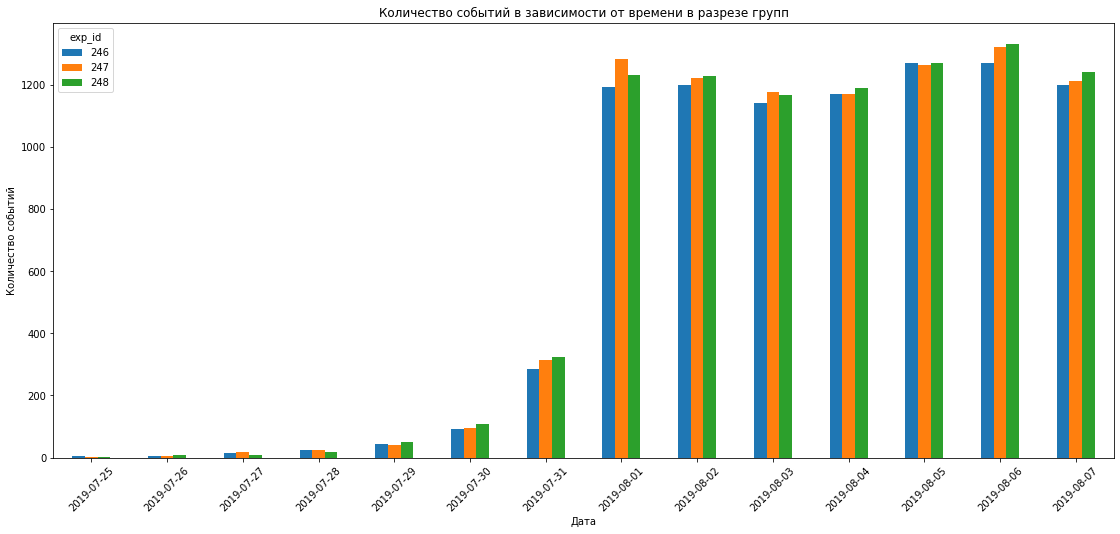

In [16]:
# построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп
eventy = df.groupby([df['date'].dt.date, 'exp_id'])['user_id'].nunique().unstack(fill_value=0)

eventy.plot(kind='bar', figsize=(19, 8))
plt.title('Количество событий в зависимости от времени в разрезе групп')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
По заданию нужно построить столбчатую диаграмму:
    
`Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп.` 
    
То есть нужно использовать один столбчатый график, где будет разбивка по группам.
    

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
    Исправила
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Отличный график👍 Предлагаю изучить интересные методы по визуализации. Прикрепляю несколько интересных ссылок:


https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
</div>

Судя по гистограмме, мы обладаем полными данными только с 01.08 по 07.08.

In [17]:
# отбросим старые данные
filtered_df = df.query('dt_event >= "2019-08-01"')

### Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [18]:
lost_events = len(df) - len(filtered_df)

lost_events

2826

In [19]:
total_events = len(df)
part_lost = (lost_events / total_events) * 100
display(f"Доля потерянных событий: {part_lost:.1f}%")

'Доля потерянных событий: 1.2%'

In [20]:
lost_users = df['user_id'].nunique() - filtered_df['user_id'].nunique()
lost_users

17

In [21]:
part_u = (lost_users / df['user_id'].nunique()) * 100
display(f"Доля потерянных пользователей: {part_u:.1f}%")

'Доля потерянных пользователей: 0.2%'

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Верный выбор даты, с которой фильтруешь данные. Потери незначительны.

</div>

### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [22]:
filtered_df.groupby('exp_id')['user_id'].agg('count')

exp_id
246    79302
247    77022
248    84563
Name: user_id, dtype: int64

Вывод: 
- Всего 243713 событий в логе
- Всего 7551 пользователей в логе
- В среднем 20 событий приходится на одного пользователя
- Мы обладаем полными данными только с 01.08 по 07.08
- Доля потерянных событий: 1.2% (2826)
- Доля потерянных пользователей: 0.2% (17).

 ## Изучите воронку событий

### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [23]:
filtered_df.groupby('event_name')['user_id'].agg('count').sort_values(ascending=False)

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: user_id, dtype: int64

### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [24]:
event_counts = filtered_df.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
total_users = df['user_id'].nunique()

event_counts_df = event_counts.reset_index()
event_counts_df.columns = ['event_name', 'unique_user_count']

event_counts_df['user_percentage'] = round((event_counts_df['unique_user_count'] / total_users) * 100, 2)
event_counts_df

,event_name,unique_user_count,user_percentage
0,MainScreenAppear,7419,98.25
1,OffersScreenAppear,4593,60.83
2,CartScreenAppear,3734,49.45
3,PaymentScreenSuccessful,3539,46.87
4,Tutorial,840,11.12


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Как думаешь, почему около 1,5% пользователей миновали главный экран?
</div>


<div class="alert alert-block alert-info">
<b>Возможно 1,5% пользователей переходили по уведомлению на нужную страницу без необходимости посещать главную</b>
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Согласен👍
</div>

### Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Мы можем предположить, что события выстраиваются в следующую последовательную цепочку:
1. Пользователь заходит на главный экран - MainScreenAppear
2. Видит/выбирает на главном экране предложения - OffersScreenAppear
3. Переходит в корзину - CartScreenAppear
4. Совершает покупку - PaymentScreenSuccessful

Руководство (Tutorial) не будем учитывать.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен с решением не включать tutorial в воронку. Это событие обычно можно пройти по желанию и на любом этапе.
</div>

### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [25]:
# фильтруем события, исключая 'Tutorial'
filtered_events = df[df['event_name'].isin(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'])]

# уникальные пользователи для каждого события
event_counts = filtered_events.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

# создаем DataFrame для воронки
funnel_df = event_counts.reset_index()
funnel_df.columns = ['event_name', 'unique_user_count']

# рассчитываем долю пользователей, переходящих от одного события к следующему
funnel_df['user_percentage'] = round(funnel_df['unique_user_count'] / funnel_df['unique_user_count'].shift(1) * 100, 1)

# Заменяем NaN на 100%
funnel_df['user_percentage'].fillna(100, inplace=True)

display(funnel_df)

,event_name,unique_user_count,user_percentage
0,MainScreenAppear,7439,100.0
1,OffersScreenAppear,4613,62.0
2,CartScreenAppear,3749,81.3
3,PaymentScreenSuccessful,3547,94.6


### На каком шаге теряете больше всего пользователей?

После 1 шага теряется практически половина пользователей.

### Какая доля пользователей доходит от первого события до оплаты?

In [26]:
first_event_users = event_counts.loc['MainScreenAppear']
payment_users = event_counts.loc['PaymentScreenSuccessful']

if first_event_users > 0:
    total_conversion_rate = round((payment_users / first_event_users) * 100, 1)
else:
    total_conversion_rate = 0
    
display(f"Доля пользователей от первого события до оплаты: {total_conversion_rate}%")

'Доля пользователей от первого события до оплаты: 47.7%'

Вывод:
1. Посмотрели, как часто встречаются в логе события:
    - MainScreenAppear - 117328
    - OffersScreenAppear - 46333
    - CartScreenAppear - 42303
    - PaymentScreenSuccessful - 33918
    - Tutorial - 1005


2. Посмотрели, сколько пользователей совершали каждое из этих событий, посчитали долю:
    - MainScreenAppear: 7419 -	98.25
    - OffersScreenAppear: 4593 -	60.83
    - CartScreenAppear: 3734 -	49.45
    - PaymentScreenSuccessful: 3539 -	46.87
    - Tutorial: 840	- 11.12


3. Мы можем предположить, что события выстраиваются в следующую последовательную цепочку:
    1. Пользователь заходит на главный экран - MainScreenAppear
    2. Видит/выбирает на главном экране предложения - OffersScreenAppear
    3. Переходит в корзину - CartScreenAppear
    4. Совершает покупку - PaymentScreenSuccessful

Руководство (Tutorial) не будем учитывать.

4. Посчитали, какая доля пользователей проходит на следующий шаг воронки:
    - MainScreenAppear: 7419 -	100.0
    - OffersScreenAppear: 4593 -	61.9
    - CartScreenAppear: 3734 -	81.3
    - PaymentScreenSuccessful: 3539 -	94.8


5. После 1 шага теряется практически половина пользователей.

6. 47.7% пользователей проходит от первого события до оплаты.

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Какие рекомендации можно дать заказчику на основании проведенного анализа?
</div>


<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:
К сожалению, не могу сказать</b>
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера v2 (что можно улучшить)**
    
Можно предложить изучить главную страницу, чтобы определить причины большого оттока после этого события.
</div>

## Изучите результаты эксперимента

### Сколько пользователей в каждой экспериментальной группе?

In [27]:
filtered_df.pivot_table(index = 'exp_id', values = 'user_id', aggfunc = 'nunique')

,user_id
exp_id,
246,2484
247,2513
248,2537


### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

Критерии успешного A/A-теста: 
- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста.

### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [28]:
# делаем срез по всем группам
group_246 = filtered_df.query('exp_id == 246')
group_247 = filtered_df.query('exp_id == 247')
group_248 = filtered_df.query('exp_id == 248')

In [29]:
# вычисляем популярное событие в 246 группе
group_246.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique').sort_values(by='user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,2450
OffersScreenAppear,1542
CartScreenAppear,1266
PaymentScreenSuccessful,1200
Tutorial,278


In [30]:
# вычисляем популярное событие в 247 группе
group_247.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique').sort_values(by='user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,2476
OffersScreenAppear,1520
CartScreenAppear,1238
PaymentScreenSuccessful,1158
Tutorial,283


In [31]:
# вычисляем популярное событие в 248 группе
group_248.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique').sort_values(by='user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,2493
OffersScreenAppear,1531
CartScreenAppear,1230
PaymentScreenSuccessful,1181
Tutorial,279


In [32]:
# общее количество уникальных пользователей в каждой группе
total_users_246 = group_246['user_id'].nunique()
total_users_247 = group_247['user_id'].nunique()
total_users_248 = group_248['user_id'].nunique()

# количество уникальных пользователей, совершивших событие MainScreenAppear
users_mainscreen_246 = group_246.query('event_name == "MainScreenAppear"')['user_id'].nunique()
users_mainscreen_247 = group_247.query('event_name == "MainScreenAppear"')['user_id'].nunique()
users_mainscreen_248 = group_248.query('event_name == "MainScreenAppear"')['user_id'].nunique()

# вычисляем долю пользователей, совершивших событие MainScreenAppear
share_main_screen_246 = round((users_mainscreen_246 / total_users_246) * 100, 2)
share_main_screen_247 = round((users_mainscreen_247 / total_users_247) * 100, 2)
share_main_screen_248 = round((users_mainscreen_248 / total_users_248) * 100, 2)

display(f'Доля пользователей в 246 группе: {share_main_screen_246}')
display(f'Доля пользователей в 247 группе: {share_main_screen_247}')
display(f'Доля пользователей в 246 группе: {share_main_screen_248}')

'Доля пользователей в 246 группе: 98.63'

'Доля пользователей в 247 группе: 98.53'

'Доля пользователей в 246 группе: 98.27'

Уровень статистически значимости - **0.05**

**Составим гипотезы:**

- H0: между долями нет статистически значимой разницы

- H1: между долями есть статистически значимая разница

Для проверки гипотез мы будем использовать **z-тест**


<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Необходимо заняться оформлением отчёта на этапе проверки гипотез:
    
1) Обозначь выбранный уровень статистической значимости.
    
2) Укажи статистический тест (критерий) проверки гипотез.
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
    Исправила
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Основные параметры проверки гипотез отражены👍
</div>

In [33]:
alpha = 0.05  # критический уровень статистической значимости
    
two_group_events = np.array([group_246[group_246['event_name'] == 'MainScreenAppear']['user_id'].nunique(), group_247[group_247['event_name'] == 'MainScreenAppear']['user_id'].nunique()])
uni_users = np.array([group_246['user_id'].nunique(), group_247['user_id'].nunique()])
    
p1 = two_group_events[0]/uni_users[0]
p2 = two_group_events[1]/uni_users[1]
    
p_combined = (two_group_events[0] + two_group_events[1]) / (uni_users[0] + uni_users[1])
    
difference = p1 - p2
    
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/uni_users[0] + 1/uni_users[1]))
    
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2
              
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
В расчёте выше и в функции неправильно посчитан z_value. Исправь ошибку и проверь результаты проверок.

    
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
    Исправила
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Проверки выполнены корректно👍
</div>

In [34]:
# напишем функцию теста статистических различий между группами
def test(g1, g2, event_name):
    
    alpha = 0.05
    
    two_group_events = np.array([g1[g1['event_name'] == event_name]['user_id'].nunique(), g2[g2['event_name'] == event_name]['user_id'].nunique()])
    uni_users = np.array([g1['user_id'].nunique(), g2['user_id'].nunique()])
    
    p1 = two_group_events[0]/uni_users[0]
    p2 = two_group_events[1]/uni_users[1]
    
    p_combined = (two_group_events[0] + two_group_events[1]) / (uni_users[0] + uni_users[1])
    
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/uni_users[0] + 1/uni_users[1]))
    
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(event_name)
          
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print()

In [35]:
# создадим список с уникальными событиями:
event_name_array = df['event_name'].unique()
# создадим цикл, который будет подставлять в функцию уникальные значения событий:
for event_name in event_name_array:
    test(group_246, group_247, event_name)

MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Вывод: Между контрольными группами 246 и 247 нет статистически значимых различий. Разбиние на группы работает корректно.

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Все верно, такой результат и ожидался. Разбиение прошло корректно и можно смело приступать к А/В тесту.
    
</div>

### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [36]:
for event_name in event_name_array:
    test(group_246, group_248, event_name)

MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Статистически значимой разницы между 246 и 248 группами нет.

In [37]:
for event_name in event_name_array:
    test(group_247, group_248, event_name)

MainScreenAppear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Статистической значимой разницы между 247 и 248 группами нет.

In [38]:
# объединим группы
group_246_247 = pd.concat([group_246, group_247])

In [39]:
# проверим объединенную контрольную группу с 248
for event_name in event_name_array:
    test(group_246_247, group_248, event_name)

MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Tutorial
p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Вывод: Статистически значимой разницы нет между объединенными контрольными группами и 248 группой. Значит, изменение на пользователей не повлияет.

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Верный вывод👍
</div>

### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

Мы брали критический уровень статистической значимости 0.05. У нас 5 уникальных событий, соответственно, мы провели 20 экспериментов. Если мы возьмем уровень значимости 0.1, то увеличилась бы вероятность ошибочного отклонения нулевой гипотезы, что могло бы привести к ложным результатам.

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
В случае, когда на одних и тех же данных тестируется несколько гипотез (проводится несколько тестов), лучше проводить коррекцию уровня значимости. Один из вариантов это сделать - поправка Бонферрони. Можешь почитать про нее ([ссылка](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D0%BE%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0_%D0%91%D0%BE%D0%BD%D1%84%D0%B5%D1%80%D1%80%D0%BE%D0%BD%D0%B8)). 
    
</div>

Вывод:
1. количество пользователей в каждой группе:
- 246 -	2484
- 247 -	2513
- 248 -	2537
2. 
- выбрали самое популярное событие
- посчитали число пользователей, совершивших это событие в каждой из контрольных групп
- посчитали долю пользователей, совершивших это событие
- между контрольными группами 246 и 247 нет статистически значимых различий. Разбиние на группы работает корректно.

3. Статистически значимой разницы нет между объединенными контрольными группами и 248 группой. Значит, изменение на пользователей не повлияет.
4. Мы брали критический уровень статистической значимости 0.05. У нас 5 уникальных событий, соответственно, мы провели 20 экспериментов. Если мы возьмем уровень значимости 0.1, то увеличилась бы вероятность ошибочного отклонения нулевой гипотезы, что могло бы привести к ложным результатам.

# Выводы

В ходе анализа данных стартапа, который продаёт продукты питания, мы выполнили следующие шаги:
1. Изучили общую информацию:
- Таблица содержит 244126 записи, и все данные находятся в одном столбце.
2. Подготовили данные:
- в таблице 243713 записей
- провели предобработку данных
- заменили названия столбцов
- пропусков нет
- изменили тип данных в столбце с датой и временем на `datetime`
- добавили новый столбец с датой
- удалили явные дубликаты
- неявных дубликатов нет.
3. Изучили и подготовили данные:
- Всего 243713 событий в логе
- Всего 7551 пользователей в логе
- В среднем 20 событий приходится на одного пользователя
- Мы обладаем полными данными только с 01.08 по 07.08
- Доля потерянных событий: 1.2% (2826)
- Доля потерянных пользователей: 0.2% (17).
4. Изучили воронку событий:


    1. Посмотрели, как часто встречаются в логе события:
        - MainScreenAppear - 117328
        - OffersScreenAppear - 46333
        - CartScreenAppear - 42303
        - PaymentScreenSuccessful - 33918
        - Tutorial - 1005

    2. Посмотрели, сколько пользователей совершали каждое из этих событий, посчитали долю:
        - MainScreenAppear: 7419 -	98.25
        - OffersScreenAppear: 4593 -	60.83
        - CartScreenAppear: 3734 -	49.45
        - PaymentScreenSuccessful: 3539 -	46.87
        - Tutorial: 840	- 11.12

    3. Мы можем предположить, что события выстраиваются в следующую последовательную цепочку:
        1. Пользователь заходит на главный экран - MainScreenAppear
        2. Видит/выбирает на главном экране предложения - OffersScreenAppear
        3. Переходит в корзину - CartScreenAppear
        4. Совершает покупку - PaymentScreenSuccessful

        Руководство (Tutorial) не будем учитывать.

    4. Посчитали, какая доля пользователей проходит на следующий шаг воронки:
        - MainScreenAppear: 7419 -	100.0
        - OffersScreenAppear: 4593 -	61.9
        - CartScreenAppear: 3734 -	81.3
        - PaymentScreenSuccessful: 3539 -	94.8

    5. После 1 шага теряется практически половина пользователей.
    6. 47.7% пользователей проходит от первого события до оплаты.
5. 


    1. количество пользователей в каждой группе:
        - 246 -	2484
        - 247 -	2513
        - 248 -	2537
    2. 
        - выбрали самое популярное событие
        - посчитали число пользователей, совершивших это событие в каждой из контрольных групп
        - посчитали долю пользователей, совершивших это событие
        - между контрольными группами 246 и 247 нет статистически значимых различий. Разбиние на группы работает корректно.

    3. Статистически значимой разницы нет между объединенными контрольными группами и 248 группой. Значит, изменение на пользователей не повлияет.
    4. Мы брали критический уровень статистической значимости 0.05. У нас 5 уникальных событий, соответственно, мы провели 20 экспериментов. Если мы возьмем уровень значимости 0.1, то увеличилась бы вероятность ошибочного отклонения нулевой гипотезы, что могло бы привести к ложным результатам.
    
В результате проведенных проверок A/B теста, статистически значимой разницы между контрольными и экспериментальной группами нет, соответственно, изменение шрифта в приложении не повлияет на пользователей.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Основные результаты отражены.
    
*Проверь результаты и выводы после исправлений недочётов*
</div>

<div class="alert alert-block alert-warning">

**Общий комментарий ревьювера**
    
Алина, мне понравилась твоя работа! Выводы структурированы и достаточно четко отражают результаты исследования, требуемые задачи были рассмотрены, хорошая работа с данными на этапе анализа конверсии и воронок. Есть навыки в проверках гипотез. Однако в работе есть недочёты, которые нужно исправить для принятия работы:
    
* построить столбчатый график распределения количества событий по датам в разрезе групп;
* указать параметры проверки гипотез;
* исправить расчёт p-value в функции.
    
Спасибо за четкие комментарии по результатам исследования и аккуратный код, это упростило проверку. Еще есть несколько рекомендаций, которые помогут тебе с будущими проектами. Жду твою работу!
    
В дополнении прикрепляю полезный материал по A/B-тесту: 

* https://your-scorpion.ru/ab-tests-check-mathematics/

</div>
